# R challenge
R version used - 3.6.1

### Importing libraries

In [1]:
library("readxl")
library("ggplot2")
library("tidyverse")
library("corrplot")
library("scales")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  2.1.1       v purrr   0.3.2  
v tidyr   0.8.3       v dplyr   0.8.0.1
v readr   1.3.1       v stringr 1.4.0  
v tibble  2.1.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
corrplot 0.90 loaded

Attaching package: 'scales'

The following object is masked from 'package:purrr':

    discard

The following object is masked from 'package:readr':

    col_factor



### Importing sales data sheet

In [2]:
toy_sales <- read_excel("toy_sales_data.xlsx")

In [3]:
toy_sales

month,sales,tv_spend,digital_spend,trend,xmas
2016-01-01,3700000,600000.0,300000.00,1,0
2016-02-01,8900000,2880000.0,90000.00,2,0
2016-03-01,8200000,864000.0,427000.00,3,0
2016-04-01,5800000,259200.0,128100.00,4,0
2016-05-01,11000000,2077760.0,538430.00,5,0
2016-06-01,7700000,623328.0,161529.00,6,0
2016-07-01,10300000,2186998.4,48458.70,7,0
2016-08-01,7800000,656099.5,14537.61,8,0
2016-09-01,9500000,196829.9,804361.28,9,0
2016-10-01,10600000,1859049.0,241308.38,10,0


In [4]:
# Checking datatypes
sapply(toy_sales,class)

$month
[1] "POSIXct" "POSIXt" 

$sales
[1] "numeric"

$tv_spend
[1] "numeric"

$digital_spend
[1] "numeric"

$trend
[1] "numeric"

$xmas
[1] "numeric"

### Create a plot of sales, TV investment and Digital investment in the y axis with time in the x axis

#### Data preparation
Creating new dataframe with 3 variables (sales, tv_spend,digital_spend) and month

In [5]:
df <- toy_sales %>%
  select(month, sales, tv_spend,digital_spend) %>%
  gather(key = "variable", value = "value", -month)
  
head(df)

month,variable,value
2016-01-01,sales,3.7e+06
2016-02-01,sales,8.9e+06
2016-03-01,sales,8.2e+06
2016-04-01,sales,5.8e+06
2016-05-01,sales,1.1e+07
2016-06-01,sales,7.7e+06


#### Visualization
Using above dataframe and ggplot function to plot a line chart of sales, TV investment and Digital investment with time.

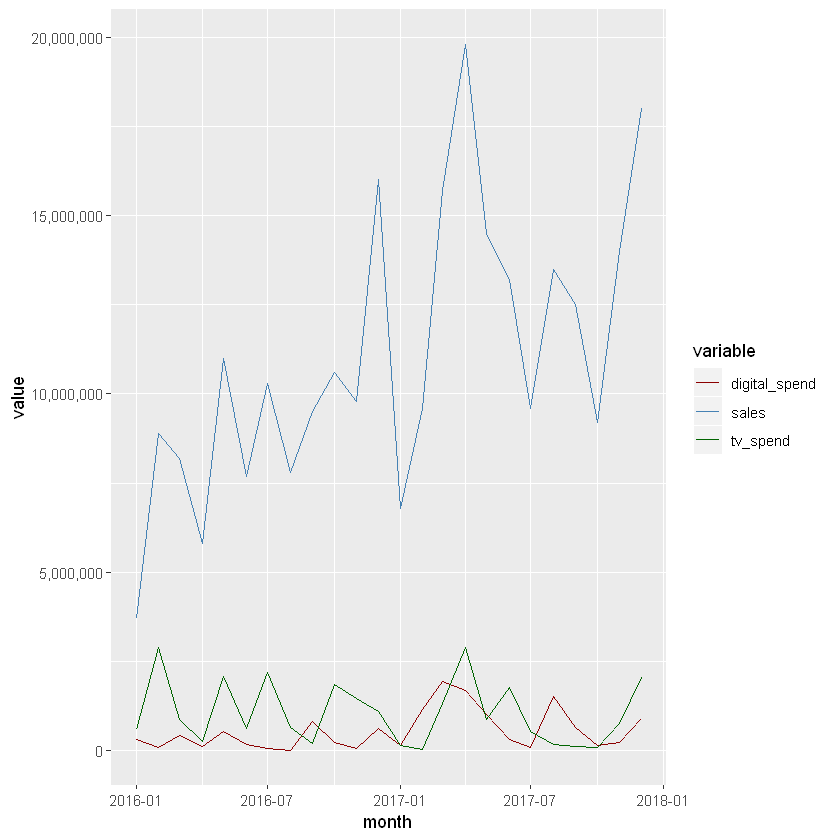

In [6]:
ggp <- ggplot(df, aes(x = month, y = value)) + 
  geom_line(aes(color = variable)) + 
  scale_color_manual(values = c("darkred", "steelblue","darkgreen"))

ggp + scale_y_continuous(labels = comma)

<b> Observations: </b>

* In general, there's an upward trend and an overall increase in sales over time.
* We can also observe that there's a seasonal change of tv_spend and digital_spend which are directly impacting the sales.

### Report the correlations among sales, TV and Digital investment

Checking correlation among different variables of data using Corrplot, keeping month out of it since it's a qualitative data.

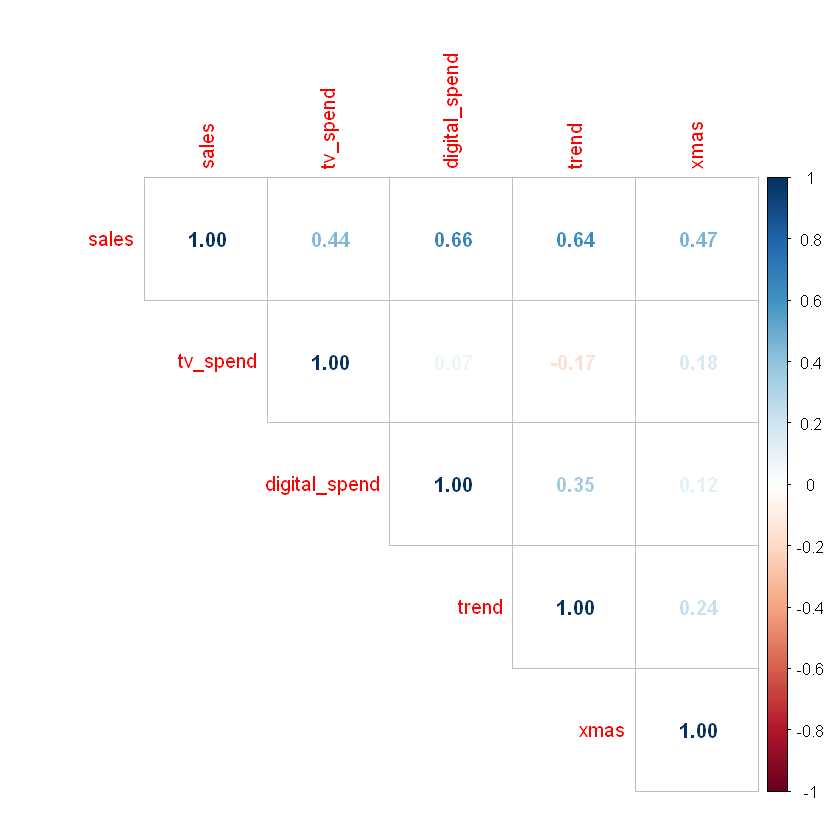

In [7]:
dat <- toy_sales %>%
  select(-month)

corrplot(cor(dat),
  method = "number",
  type = "upper" # show only upper side
)


#### Observations:
* There's a positive and strong correlation among sales and digital_spend of 0.66.
* There's a positive correlation but not much strong among sales and tv_spend of 0.44.
* There's a weak correlation among tv_send and digital_spend.

#### Above observations can be verified using scatterplots below.

<b> 1. Scatterplot between sales and TV investment </b>

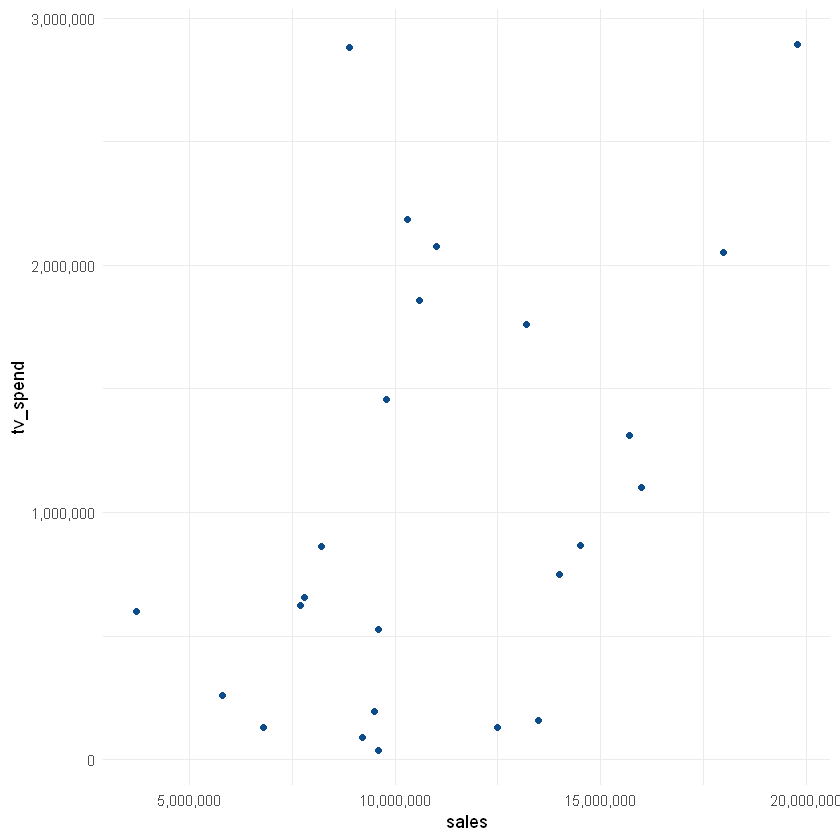

In [8]:
ggplot(toy_sales) +
  aes(x = sales, y = tv_spend) +
  geom_point(colour = "#0c4c8a") +
  theme_minimal()+scale_y_continuous(labels = comma)+scale_x_continuous(labels = comma)

<b> 2. Scatterplot between sales and Digital investment </b>

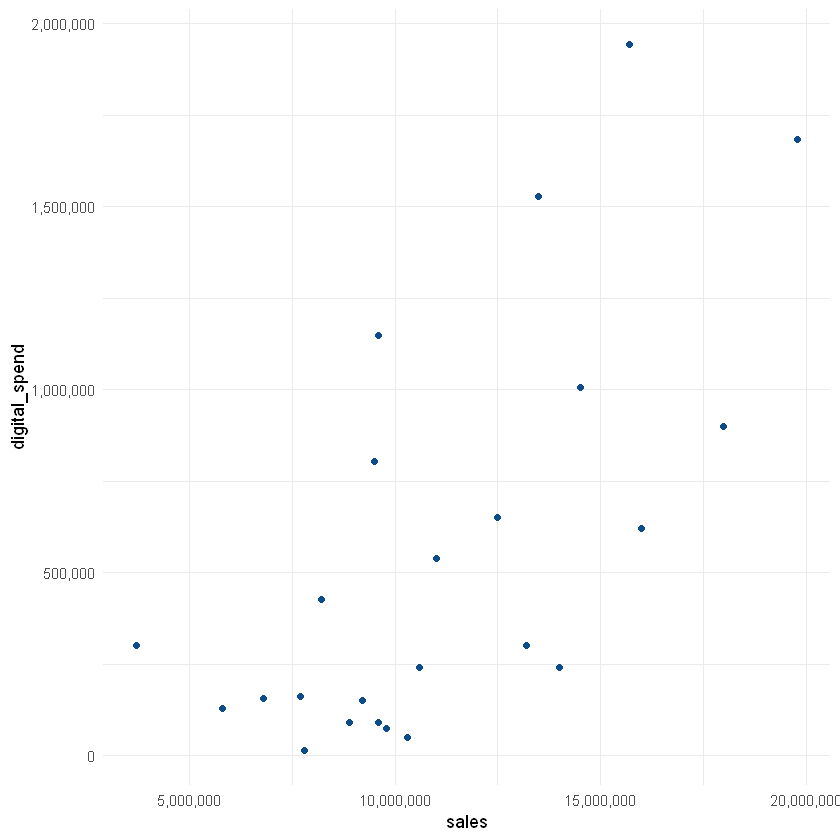

In [9]:
ggplot(toy_sales) +
  aes(x = sales, y = digital_spend) +
  geom_point(colour = "#0c4c8a") +
  theme_minimal()+scale_y_continuous(labels = comma)+scale_x_continuous(labels = comma)

<b> 3. Scatterplot between TV investment and Digital investment </b>

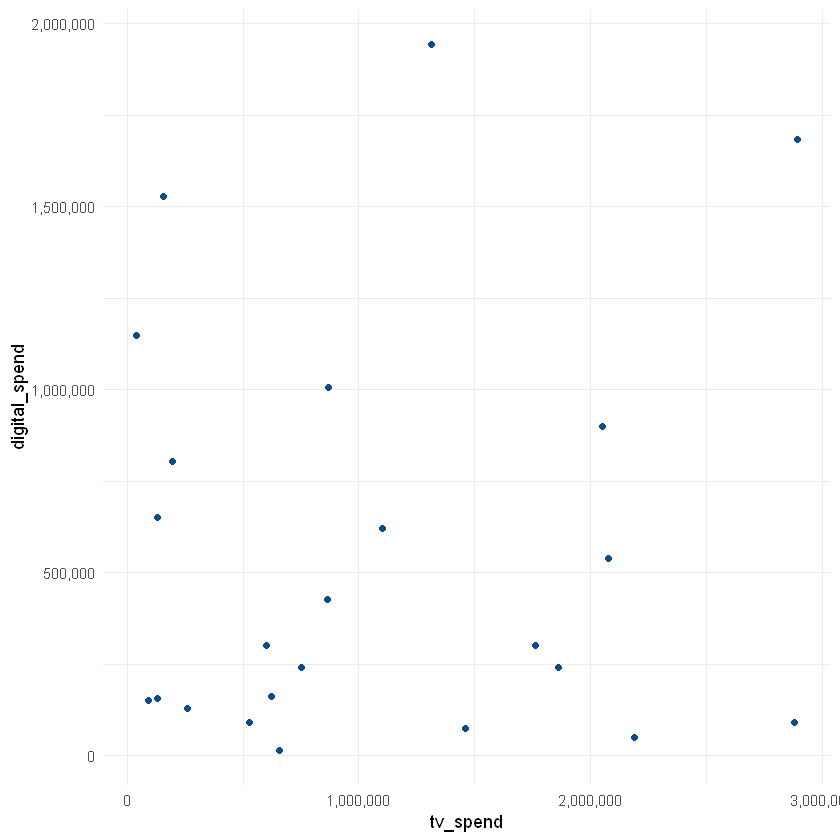

In [10]:
ggplot(toy_sales) +
  aes(x = tv_spend, y = digital_spend) +
  geom_point(colour = "#0c4c8a") +
  theme_minimal()+scale_y_continuous(labels = comma)+scale_x_continuous(labels = comma)

### Fit a regression model to data, using all data points you have available

To fit a linear regression model below, we're keeping <b> month </b> out of the model since <b> trends and xmas </b> variables are function of month variable which are being used in the model.

In [11]:
model = lm(sales~.-month, data = toy_sales) #Create the linear regression
summary(model)


Call:
lm(formula = sales ~ . - month, data = toy_sales)

Residuals:
     Min       1Q   Median       3Q      Max 
-2148071  -749281   198668   798127  2099176 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.451e+06  6.706e+05   5.146 5.74e-05 ***
tv_spend      2.026e+00  3.071e-01   6.599 2.58e-06 ***
digital_spend 2.983e+00  5.040e-01   5.919 1.07e-05 ***
trend         2.863e+05  4.156e+04   6.888 1.44e-06 ***
xmas          2.935e+06  9.730e+05   3.016  0.00711 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1245000 on 19 degrees of freedom
Multiple R-squared:  0.9161,	Adjusted R-squared:  0.8984 
F-statistic: 51.84 on 4 and 19 DF,  p-value: 5.817e-10


<b> Observations: </b>
* <b> Adjusted R square </b> helps in understanding the fit of the model which in this case shows that our linear regression model has fitted fairly good to the actual data.
* <b> Adjusted R square = 0.89 </b> means the model fits about 89% of the training data, which is considered a good fit.
* <b> P - value </b> helps in understanding the significance of the model. If p-value is extremely small (<0.001) then it is considered highly significant.
* From above summary, we can see <b> p-value = 5.817e-10 </b> which is extremely small and shows a strong evidence against the null hypothesis.
* <b> Significance of each regressor:</b> From summary above, we can observe that our each regressor is highly significant and have p-values between <b> [0, 0.001] </b> except 'xmas' regressor which has p-value between <b> (0.001, 0.01]. </b>

### Calculate the contribution from TV Spend to sales in % and absolute dollar value

In [12]:
toy_sales

month,sales,tv_spend,digital_spend,trend,xmas
2016-01-01,3700000,600000.0,300000.00,1,0
2016-02-01,8900000,2880000.0,90000.00,2,0
2016-03-01,8200000,864000.0,427000.00,3,0
2016-04-01,5800000,259200.0,128100.00,4,0
2016-05-01,11000000,2077760.0,538430.00,5,0
2016-06-01,7700000,623328.0,161529.00,6,0
2016-07-01,10300000,2186998.4,48458.70,7,0
2016-08-01,7800000,656099.5,14537.61,8,0
2016-09-01,9500000,196829.9,804361.28,9,0
2016-10-01,10600000,1859049.0,241308.38,10,0


#### Contribution from TV Spend to sales in absolute dollar value

Contribution = Total tv Spend * Coefficient of Tv_spend 

In [13]:
round(sum(toy_sales$tv_spend * summary(model)$coeff[2]),2)

[1] 51622803

#### Contribution from TV Spend to sales in %
Contribution % = (Total tv Spend * Coefficient of Tv_spend)/ Total sales

In [14]:
(sum(toy_sales$tv_spend * summary(model)$coeff[2])/sum(toy_sales$sales) )*100

[1] 19.42894

### Calculate the TV return on investment (ROI)
Coefficient of TV spend

In [15]:
ROI = summary(model)$coeff[2]

### Using the planned spend values for the first 3 months of 2018 and your regressions model, calculate the expected sales value for the first 3 months of 2018

#### Importing "planned_spend" data - added fields trend and xmas to make it consistent with the model above

In [16]:
planned_spend = read_excel("toy_sales_data.xlsx","planned_spend")

In [17]:
planned_spend

month,tv_spend,digital_spend,trend,xmas
2018-01-01,350000,215000,25,0
2018-02-01,950000,150000,26,0
2018-03-01,1350000,400000,27,0


#### Predicting

In [18]:
expected_sales = predict(lm, newdata = planned_spend)

ERROR: Error in UseMethod("predict"): no applicable method for 'predict' applied to an object of class "function"


In [ ]:
round(expected_sales,2)

<b> Observation: </b>

Expected sales value for first 3 months of 2018:
1. <b> 2018-01-01:</b> $11958795

2. <b> 2018-02-01:</b>  $13267129.29

3. <b> 2018-03-01:</b>  $15109711.57


### In your opinion what additional data would improve your model and why?

* Customer details like number of customers will help in improving the model. By tracking customer details, we can track frequency of purchases and activity of customers along with the retention power.
* Demographics data to understand customer engagement based on the characteristics of customers like their household type, age, marital status and gender.
* This will help in segmenting our audience into subgroups and we can understand customer behaviour and their interests accordingly.
* We can also bring in spatial data which will provide us more insights and we can use location intelligence to target our customers.